In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(50)
coord_cols = ['x', 'y', 'z']
speed_cols = ['Vx', 'Vy', 'Vz']
state_cols = coord_cols + speed_cols
state_cols_sim = [s+'_sim' for s in state_cols]
# anchor_cols = state_cols + ['distance', 'abs_speed']

In [3]:
def get_satellite_data(data, sat_id):
    '''
    returns all data for particular satellite by id
    '''
    return data[data['sat_id'] == sat_id]

def smape(satellite_predicted_values, satellite_true_values):
    # the division, addition and subtraction are pointwise
    return np.mean(np.abs((satellite_predicted_values - satellite_true_values)/
                (np.abs(satellite_predicted_values) + np.abs(satellite_true_values))))

In [4]:
train_nla = pd.read_csv('train_transformed.csv')
train = pd.read_csv('data/train.csv')
train_t1 = train.loc[train['sat_id'].isin(train_nla['sat_id'].unique())]

In [5]:
sat_t1 = train_t1['sat_id'].unique()

In [6]:
train_nla.columns

Index(['id', 'x_sim', 'y_sim', 'z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim', 'sat_id',
       'epoch'],
      dtype='object')

In [7]:
train_t1.columns

Index(['id', 'epoch', 'sat_id', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'x_sim',
       'y_sim', 'z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'],
      dtype='object')

In [9]:
smapes_nla = {}
for sat in sat_t1:
    d = get_satellite_data(train_t1,sat)[state_cols]
    d.rename(columns = {s:s+"_sim" for s in state_cols},inplace=True)
    d_nla = get_satellite_data(train_nla,sat)
    
    smapes_nla[sat] = smape(d.to_numpy(),d_nla[state_cols_sim].to_numpy())

In [10]:
from collections import OrderedDict

In [11]:
smapes_nla_sorted = OrderedDict(sorted(smapes_nla.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [12]:
smapes = {}
for sat in sat_t1:
    d = get_satellite_data(train_t1,sat)#[state_cols]
   
    smapes[sat] = smape(d[state_cols].to_numpy(),d[state_cols_sim].to_numpy())

In [13]:
smapes_sorted = OrderedDict(sorted(smapes.items(), 
                                  key=lambda kv: kv[1], reverse=True))
#smapes_sorted

In [15]:
smapes_df = pd.DataFrame([smapes_nla_sorted,smapes]).T
smapes_df.columns = ['nla','original']
smapes_df['original minus nla'] = smapes_df['original']-smapes_df['nla']
smapes_df['original minus nla normed'] = smapes_df['original minus nla']/smapes_df['original']
#smapes_df.sort_values('original',ascending=False).head(50)

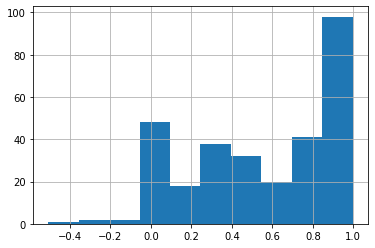

In [16]:
smapes_df['original minus nla normed'].hist();

In [17]:
smapes_df.to_csv('smapes_df.csv')